In [1]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 
import shutil
import pdb

In [2]:
zip_path = "/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip"
extract_path = "/kaggle/working/"

shutil.unpack_archive(zip_path, extract_path)

In [3]:
zip_path = "/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip"
extract_path = "/kaggle/working/"

shutil.unpack_archive(zip_path, extract_path)

In [4]:
img1 = "/kaggle/working/train/cat.11679.jpg"
img2 = "/kaggle/working/train/dog.2811.jpg"
img3 = "/kaggle/input/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg"
img4 = "/kaggle/input/fruits/fruits-360_dataset_100x100/fruits-360/Training/Banana 1/0_100.jpg"
imgs = [img1, img2, img3, img4]

In [5]:
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

In [6]:
def get_predictions(model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.Resampling.LANCZOS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = load_image(img_path)
        preds  = decode_predictions(model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

Now, I can perform following steps :

1. import VGG16 architecture from keras.applications
2. Add the saved weights to the architecture
3. Use model to perform predictions

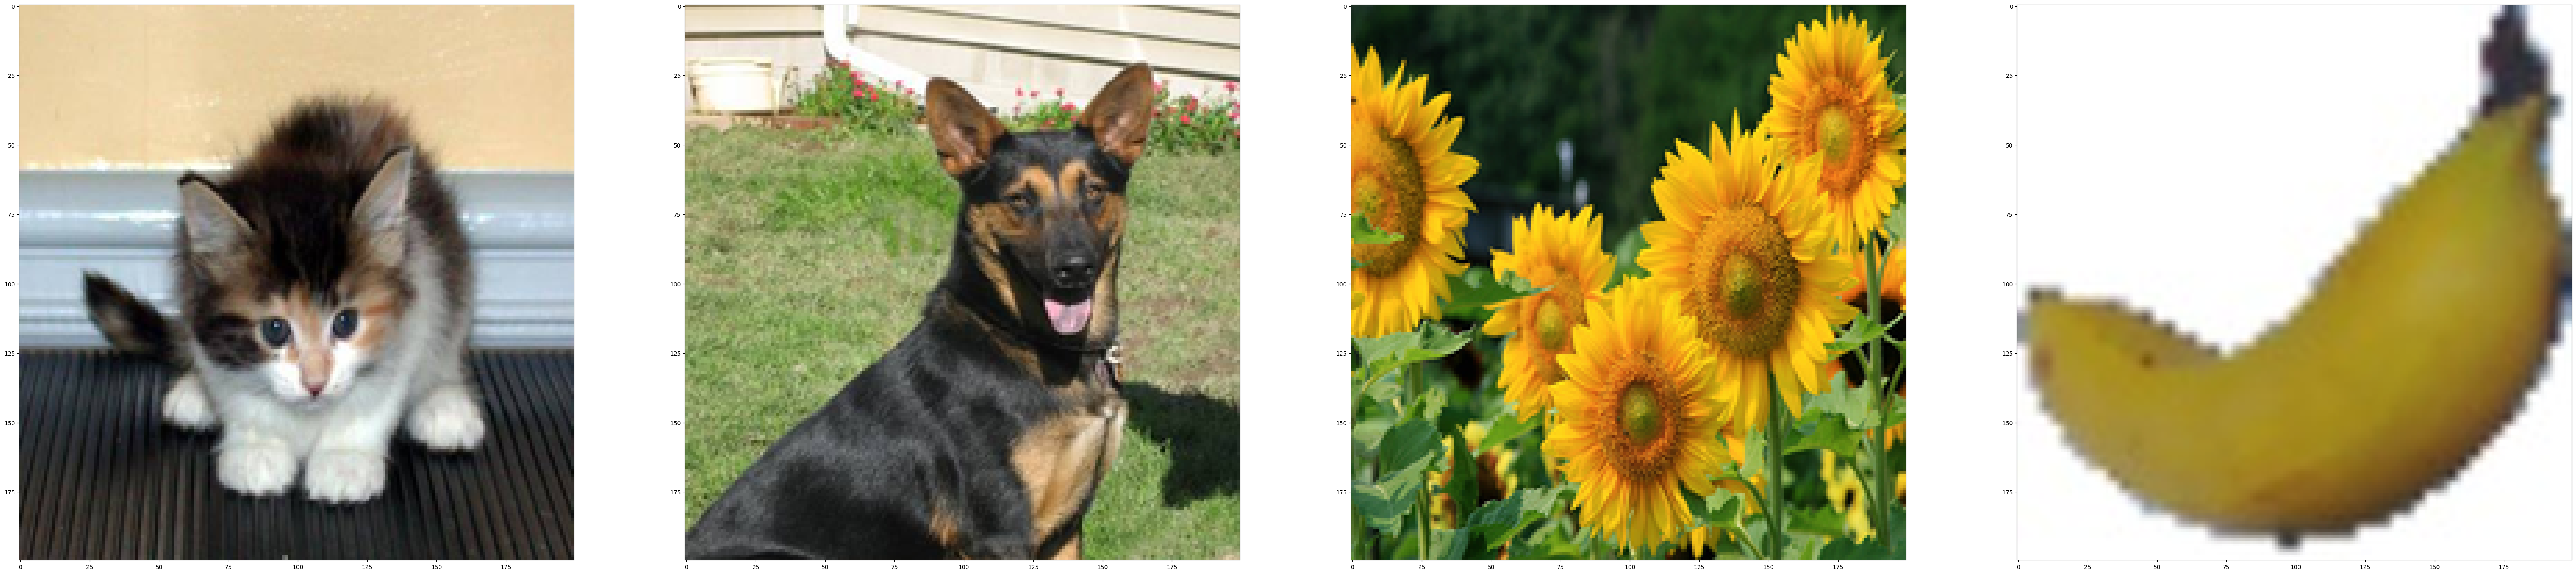

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


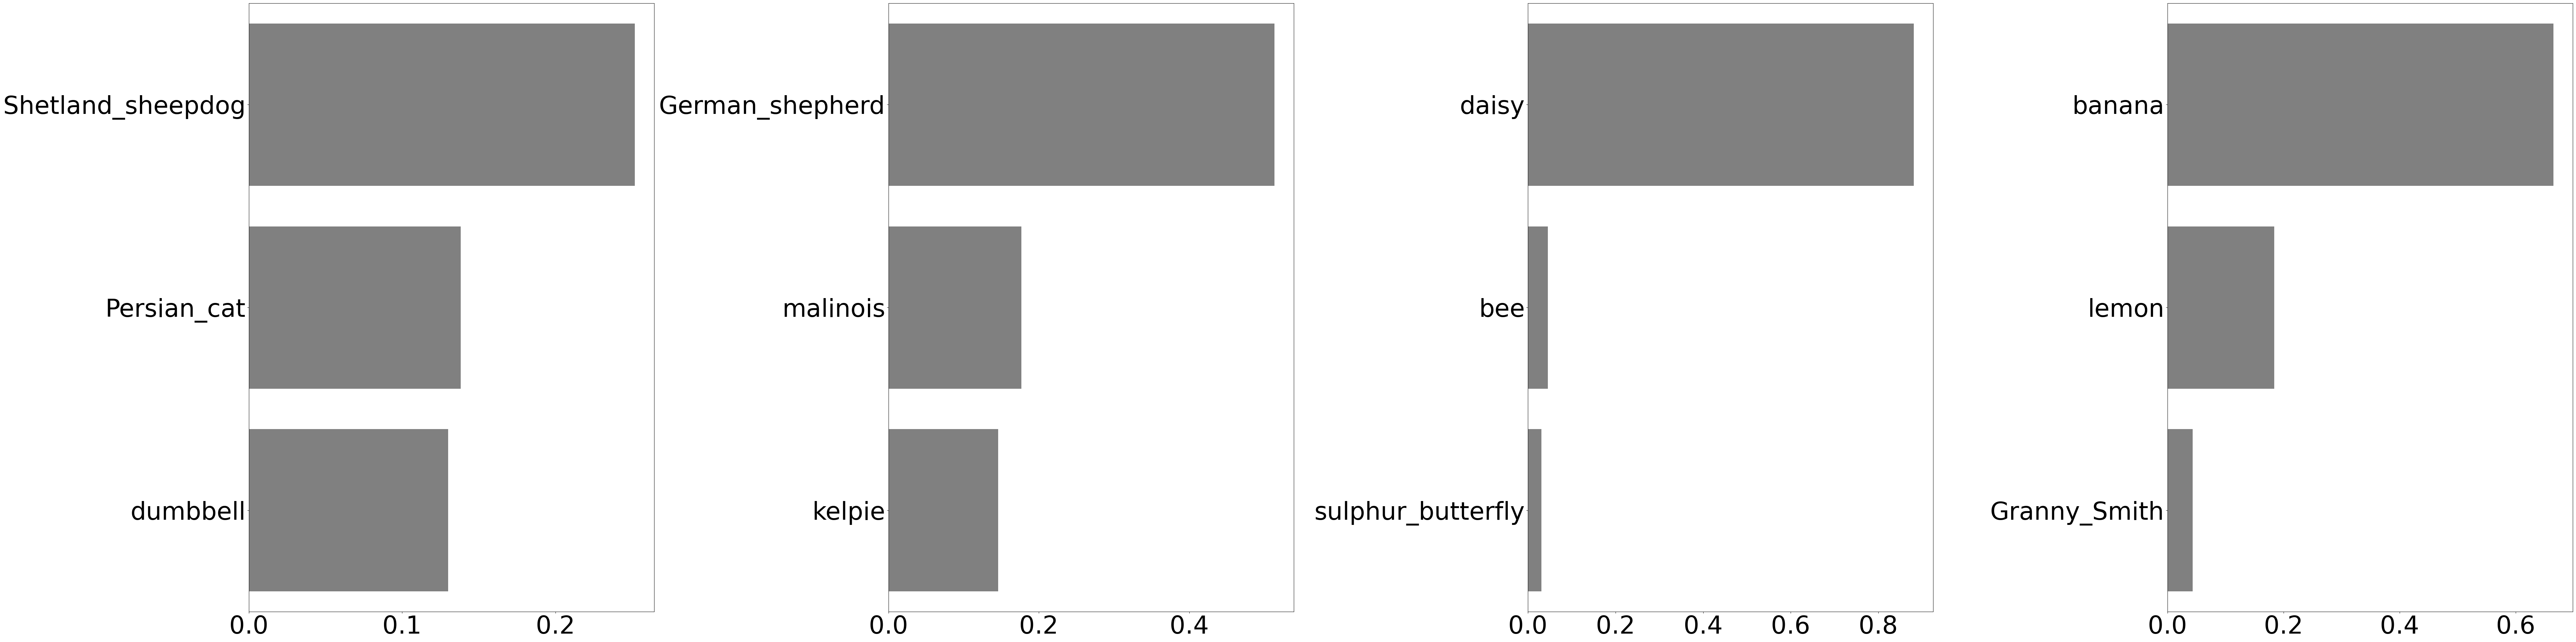

In [7]:
from keras.applications.vgg16 import VGG16
vgg16_weights = '/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights = vgg16_weights)
get_predictions(vgg16_model)